# KoNLPy 설치 방법
- 'Konlpy 오류시 참고'로 검색
- jpype download(https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype)
- 본인의 파이썬 버전에 맞게 설치
- version: JPype1-1.1.2-cp38-cp38-win_amd64.whl
- download 프로그램이 있는 디렉토리로 이동
- pip install JPype1-1.1.2-cp38-cp38-win_amd64.whl
- pip install konlpy

In [1]:
import konlpy
konlpy.__version__

'0.5.2'

In [2]:
# open koean
from konlpy.tag import Okt
okt = Okt()

In [3]:
okt.nouns('해당 에러가 발생하는 것을 알 수 있다')

['해당', '에러', '발생', '것', '알', '수']

### 여친 선물 - 워드클라우드 만들기

### 명사 추출하기

In [4]:
with open('data/gift.txt', 'r', encoding='utf-8') as f:
    gift_text = f.read()

In [5]:
tokens = okt.nouns(gift_text)
tokens[:10]

['반지', '목걸이', '커플', '가디건', '커플', '모자', '신지', '몇개', '추천', '제품']

In [6]:
# 영문자, 숫자 제거
import re
new_tokens = []
for token in tokens:
    text = re.sub('[a-zA-Z0-9]', '', token)
    if text:
        new_tokens.append(text)

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
# 한글폰트 사용
mpl.rc("font", family = 'Malgun Gothic')
mpl.rc('axes', unicode_minus = False)

- 아래 두 셀을 반복해서 실행하여 stop_words를 갱신한다

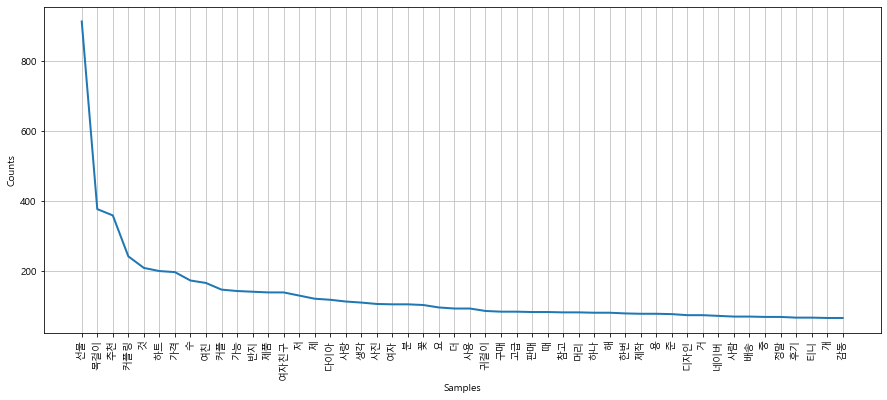

In [8]:
import nltk

gf_gift = nltk.Text(new_tokens, name= '여친선물')
plt.figure(figsize=(15,6))
gf_gift.plot(50)
plt.show()

In [9]:
stop_words = ['선물','추천','것','가격','여친','제품','여자친구','제','요','더','고급',
    '판매','때','참고','하나','해','한번','제작','용','준','디자인','거','네이버','사람',
    '배송','중','정말','후기','감동'
    '커플','가능','저','사랑','생각','사용','개','세대','인기','상품','직접','브랜드',
    '선택','곳','모양','마감','요즘','오늘','가지','남녀','그냥','위','페이',
    '마음','부담','남자','협찬','전','핸드','의미','변경','도움','색상','아래','포장',
    '처','조금',
    '하루','정도','처리','보시','심플','가장','여성','때문','정보',
    '독서','주소','쇼핑','링크','이니셜','기념일',
    '헤어','질문','친구','스토어','아주','할인',
    '스','이면','남','지금','센스','수', '구매', '감동']
new_tokens = [word for word in new_tokens if word not in stop_words]
new_tokens[:10]  

['반지', '목걸이', '커플', '가디건', '커플', '모자', '신지', '몇개', '투척', '클래식']

- 워드클라우드 그리기

In [11]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud

In [12]:
data = gf_gift.vocab().most_common(300)

wc = WordCloud(
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.2,
    background_color='white'
).generate_from_frequencies(dict(data))

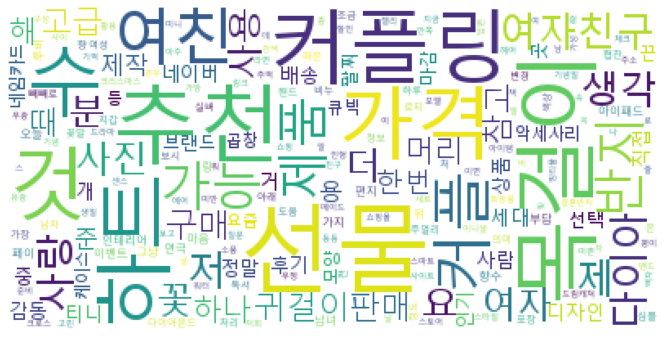

In [13]:
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis("off")
plt.show()

- 하트 그림에 표시하기

In [14]:
mask = np.array(Image.open('data/heart.jpg'))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [15]:
wc = WordCloud(
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling = 0.3, mask=mask,
    background_color = 'white',
    min_font_size=1, max_font_size=100
).generate_from_frequencies(dict(data))

default_colors = wc.to_array()

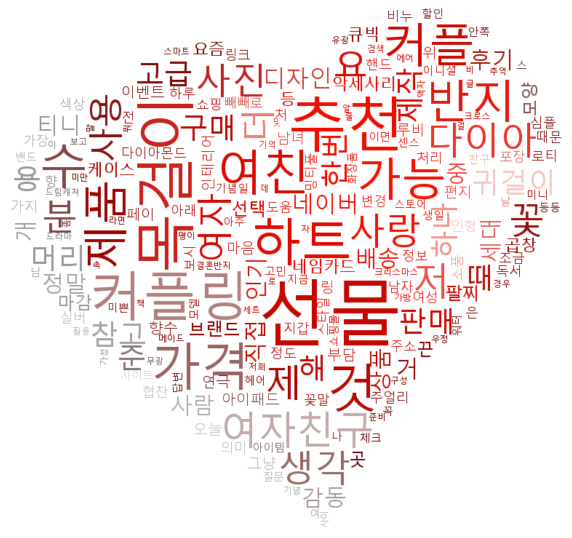

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()